In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from nbformat.sign import algorithms

In [2]:
def display(img,cmap = 'gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [3]:
img1 = cv2.imread(r"C:\Work\Programing Language\Python\Libraries\OpenCV\data\img_8.png",0)
img1.shape

(1000, 657)

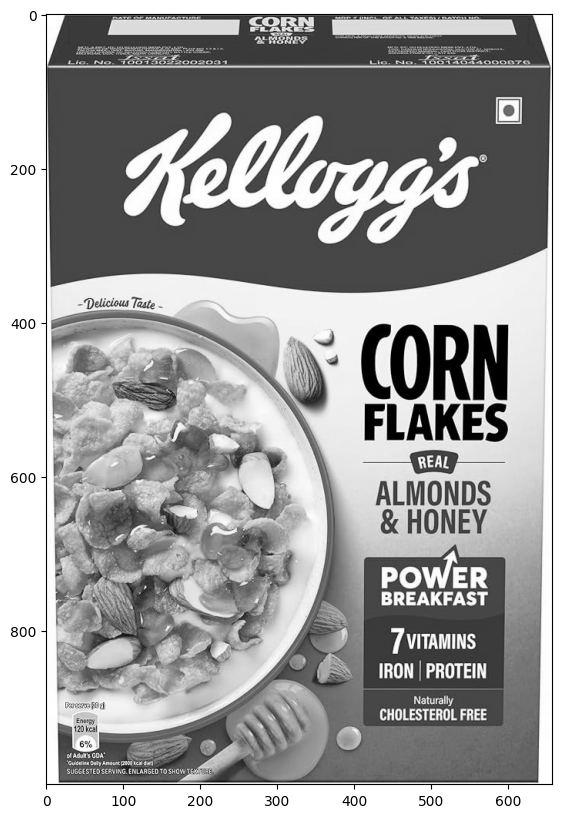

In [4]:
display(img1)
# plt.imshow(img1)

In [5]:
img2 = cv2.imread(r"C:\Work\Programing Language\Python\Libraries\OpenCV\data\img_9.png",cv2.IMREAD_GRAYSCALE)
img2.shape

(500, 750)

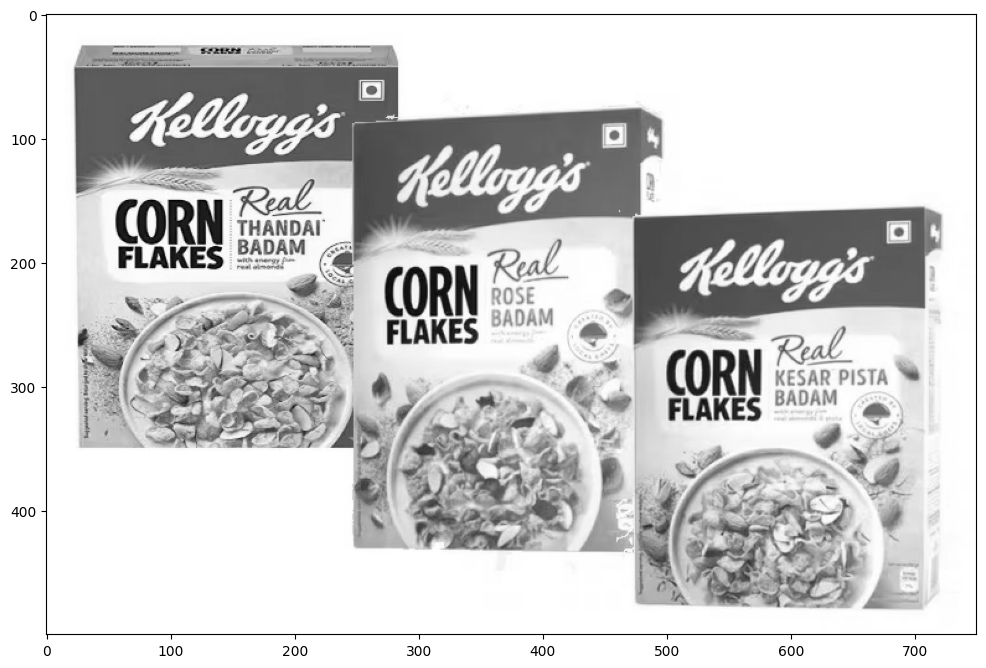

In [6]:
display(img2)

## BRUTE FORCE METHOD FOR ORB DESCRIPTORS

In [7]:
orb= cv2.ORB_create()

In [8]:
kp1,des1 = orb.detectAndCompute(img1,None)
kp2,des2 = orb.detectAndCompute(img2,None)



* `kp` = KEY POINTS
* `DES` = DESCRIPTIONS

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [10]:
matches = bf.match(des1,des2)
len(matches)

153

In [11]:
# sort matches based on distance
matches = sorted(matches,key= lambda  x:x.distance)
img1_matches = cv2.drawMatches(img1,kp1,img2,kp2,matches[0:101],None,flags=2)

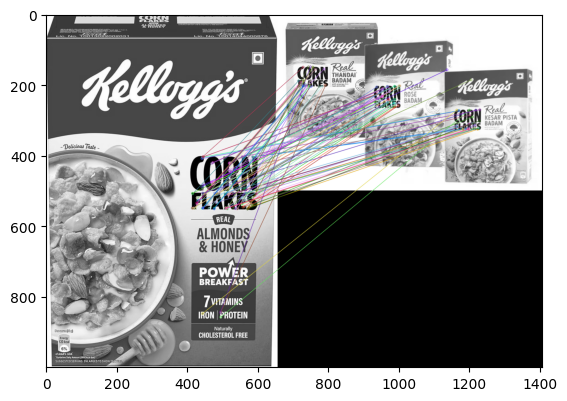

In [12]:
plt.imshow(img1_matches)

# Now Implimenting SIFT + Lowe's Ratio test
* `SIFT` =  sift descriptors are floating point vectors with 128 dimentions we compare vector by `euclidian DIstance` and `lowe's ratio test`
* `lowe's ratio test` = we compare best and 2nd best match; if the ratio is less than a specified threshold then the matches are acceptable

In [13]:
sift = cv2.xfeatures2d.SIFT_create()

In [14]:
kp1,des1 = sift.detectAndCompute(img1,None)
kp2,des2 = sift.detectAndCompute(img2,None)


In [15]:
bf = cv2.BFMatcher()

In [16]:
matches = bf.knnMatch(des1,des2,k=2)

## applying ratio test
* if distance is less than `75%` between 2 matches then it is a good match
* less dist = better match

In [17]:
good = []
for match1,match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1])

In [18]:
len(good)
# good = sorted(good, key=lambda x: x.distance)
# len(matches)

112

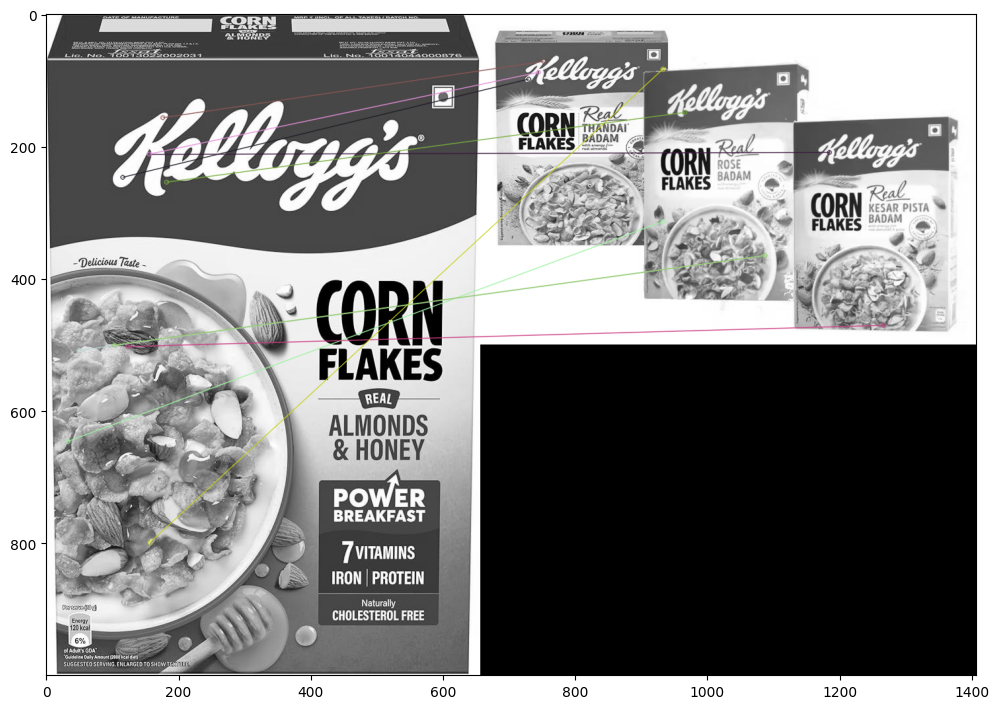

In [19]:
sift_matches = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good[:10],None,flags=2)
display(sift_matches)

# FLANN BASED MATCHES


In [22]:
sift = cv2.xfeatures2d.SIFT_create()
kp1,des1 = sift.detectAndCompute(img1,None)
kp2,des2 = sift.detectAndCompute(img2,None)

# FLANN - fast lib for approx nearest neighbour

In [28]:
FLANN_INDEX_KDTREE = 0
index_param = dict(algorithm= FLANN_INDEX_KDTREE,trees = 5)
search_params = dict(checks = 50)

In [29]:
flann = cv2.FlannBasedMatcher(indexParams=index_param,searchParams=search_params)

In [30]:
matches = flann.knnMatch(des1,des2,k=2)

In [31]:
good = []
for match1,match2 in matches :
    if match1.distance <0.7*match2.distance :
        good.append([match1])

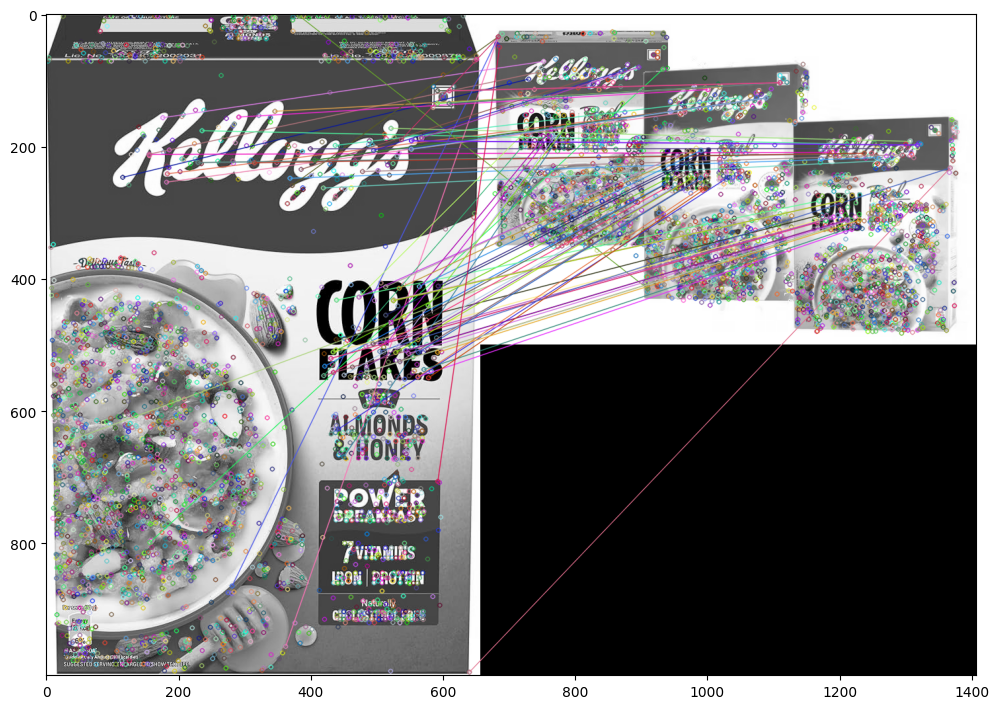

In [34]:
flann_matches = cv2.drawMatchesKnn(img1,kp1,img2,kp2,good,None,flags = 0)
display(flann_matches)